# Describing Distributions (Core)
- Coire Gavin-Hanner
- 10/5/22

# Task
- Analyze serval features of a medical dataset using a distribution
    - VitD_levels
    - Doc_visits
    - TotalCharge
    
- In the distribution include
    - red line for mean
    - green line for median
    - black lines for +- 1 std
    - highlight the +- 1 std range in yellow

- Answer the Following Questions:
    - is the distribution discrete or continuous?
    - does it have a skew? if so which directio? (+/-)
    - what type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    

# Imports and Definitions

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [29]:
def plot_dist(data, xlab='x', title='histogram'):  
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(data, density=True, alpha=0.5)
    sns.kdeplot(data=data, ax=ax, color='purple', label='KDE')
    ax.set_ylabel('Probability')
    ax.set_xlabel(xlab)
    ax.axvline(data.mean(), color='red', label='Mean')
    ax.axvline(data.median(), color='green', label='Median')
    ax.axvline(data.mean() + data.std(), color='black', label=r'Mean $\pm 1$ STD')
    ax.axvline(data.mean() - data.std(), color='black')
    ax.axvspan(xmin=data.mean() - data.std(),
               xmax=data.mean() + data.std(),
               color='yellow',
               zorder=0,
               alpha=0.5)
    plt.title(title)
    plt.legend(loc='best')
    plt.show()
    

# Load Source Data

In [5]:
df = pd.read_csv('Data/medical_dataset.csv')

In [6]:
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


# VitD_levels

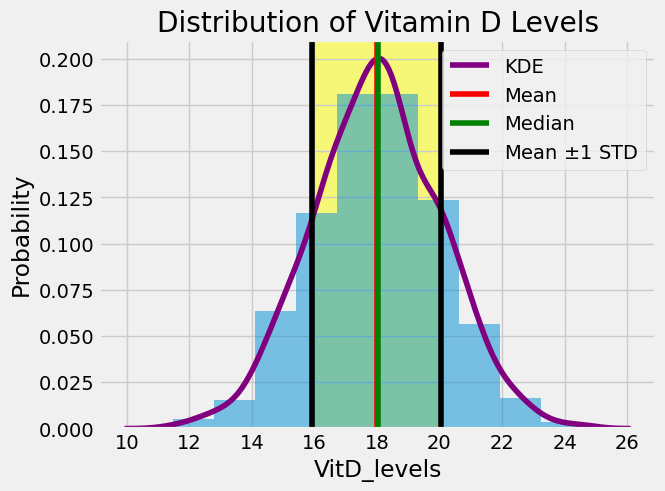

In [30]:
plot_dist(df['VitD_levels'], xlab='VitD_levels', title='Distribution of Vitamin D Levels')

In [31]:
stats.kurtosis(df['VitD_levels'], fisher = False)

3.013147515833447

- The distribution of vitamin d levels
    - is continuous
    - is not skewed
    - is Mesokurtic

# Doc_visits

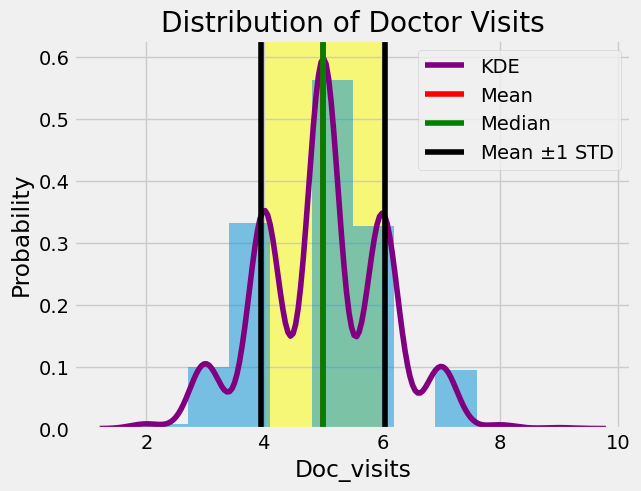

In [32]:
plot_dist(df['Doc_visits'], xlab='Doc_visits', title='Distribution of Doctor Visits')

In [34]:
stats.kurtosis(df['Doc_visits'], fisher = False)

2.9919958083381206

- The distribution of number of doctor visits is
    - discrete
    - not skewed
    - mesokurtic

# TotalCharge

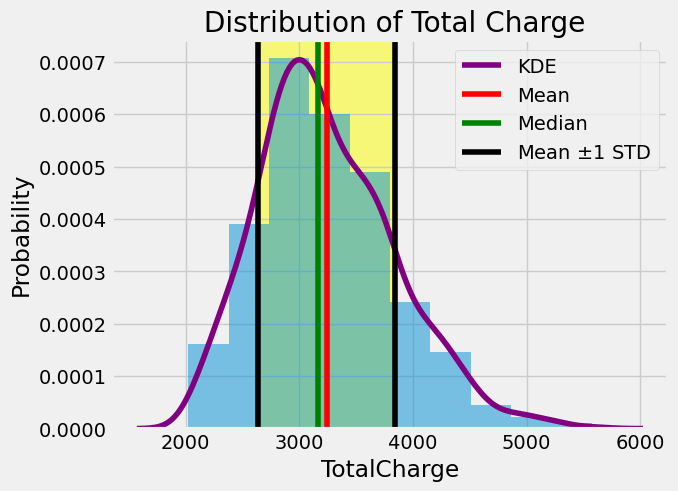

In [35]:
plot_dist(data=df['TotalCharge'], xlab='TotalCharge', title=' Distribution of Total Charge')

In [36]:
stats.kurtosis(df['TotalCharge'], fisher=False)

3.2650077463439384

- The distribution of Total charge is
    - continuous
    - positively skewed
    - mesokurtic